**기초적인 객체지향프로그래밍 개념과 Subclassing 방식에 대한 학습을 전제로 진행합니다.**

창원) [http://schoolofweb.net/blog/posts/파이썬-oop-part-3-클래스-변수class-variable/](http://schoolofweb.net/blog/posts/%ED%8C%8C%EC%9D%B4%EC%8D%AC-oop-part-3-%ED%81%B4%EB%9E%98%EC%8A%A4-%EB%B3%80%EC%88%98class-variable/)

여기에서 python oop_3.py 동작 원리가 이해가 되지 않습니다!

In [71]:
class Employee(object):
    
    raise_amount = 1.1
    num_of_emps = 0  #1 클래스 변수 정의
    # 인스턴스 변수가 사람의 이름과 같이 각각의 인스턴스마다 가지고 있는 고유한 데이터라면, 
    # 클래스 변수는 한 단체의 단체명과 같이 같은 클래스로 만들어진 모든 인스턴스가 공유하는 데이터입니다.
    
    def __init__(self, first, last, pay):
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first.lower() + '.' + last.lower() + '@schoolofweb.net'
        
        Employee.num_of_emps += 1  #2 인스턴스가 생성될 때마다 1씩 증가

    def __del__(self):
        Employee.num_of_emps -= 1  #3 인스턴스가 제거될 때마다 1씩 감소
        
    def full_name(self):
        return '{} {}'.format(self.first, self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay * self.raise_amount)  #1 인스턴스 변수부터 참조를 합니다.


In [74]:
print(Employee.num_of_emps)  # 처음 직원 수
emp_1 = Employee('Sanghee', 'Lee', 50000)  # 직원 1명 입사 
emp_2 = Employee('Minjung', 'Kim', 60000)  # 직원 1명 입사
print(Employee.num_of_emps)  # 직원 수 확인

0
2


In [76]:
print(emp_1.pay)  # 기존 연봉
emp_1.apply_raise()  # 인상률 적용
print(emp_1.pay)  # 오른 연봉

50000
55000


In [72]:
del emp_1  # 직원 1명 퇴사
del emp_2  # 직원 1명 퇴사
print(Employee.num_of_emps)  # 직원 수 확인

0
2
0


왜 Employee의 글로벌 변수인 Raise_amount를 self.으로 받는가? Employee.이 아니라?@ <br>
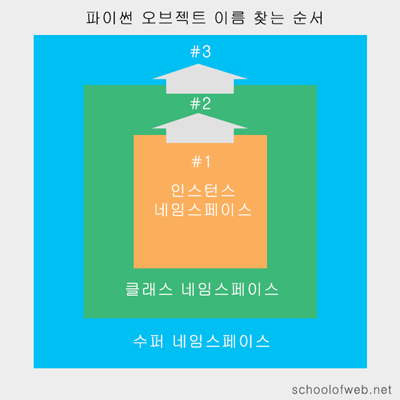 <br>
그럼, 항상 self로 해주면 되는건가.. ? 인스턴스 변수와 클래스 변수 무슨 차이? <br>
num_of_emps처럼 인스턴스한 회수를 Self. 으로 인스턴스 변수를 활용해서 알 수 없다. 이렇게 클래스 변수를 사용하여 인스턴스 변수로는 관리하기 힘든 데이터를 쉽게 관리할 수가 있는 것입니다. 어떻게 보면 일반 함수에서 사용하는 전역 변수(global variable)와 비슷한 개념입니다.

## **모델 설계 어떤 프로세스로 했는가?** 
### 데이터 로드 
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#used-in-the-notebooks
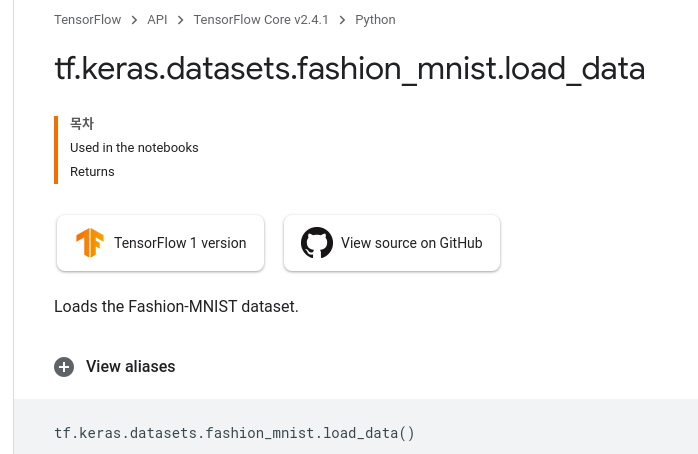
### 데이터 정규화 
### 입력 형태로 데이터 변환 
### 모델 설계
### 모델 학습 및 손실함수와 최적화 알고리즘 설정
### 모델 평가 
### 모델 예측 

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

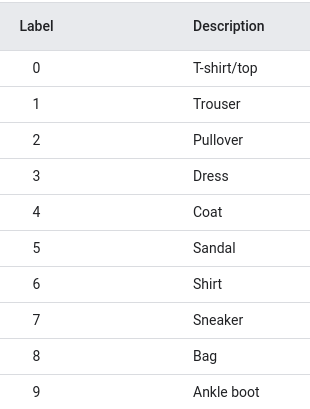

---
## **Subclassing 어떻게 할까?**
### 공식문서 참고가 답이다!
https://www.tensorflow.org/api_docs/python/tf/keras/Model
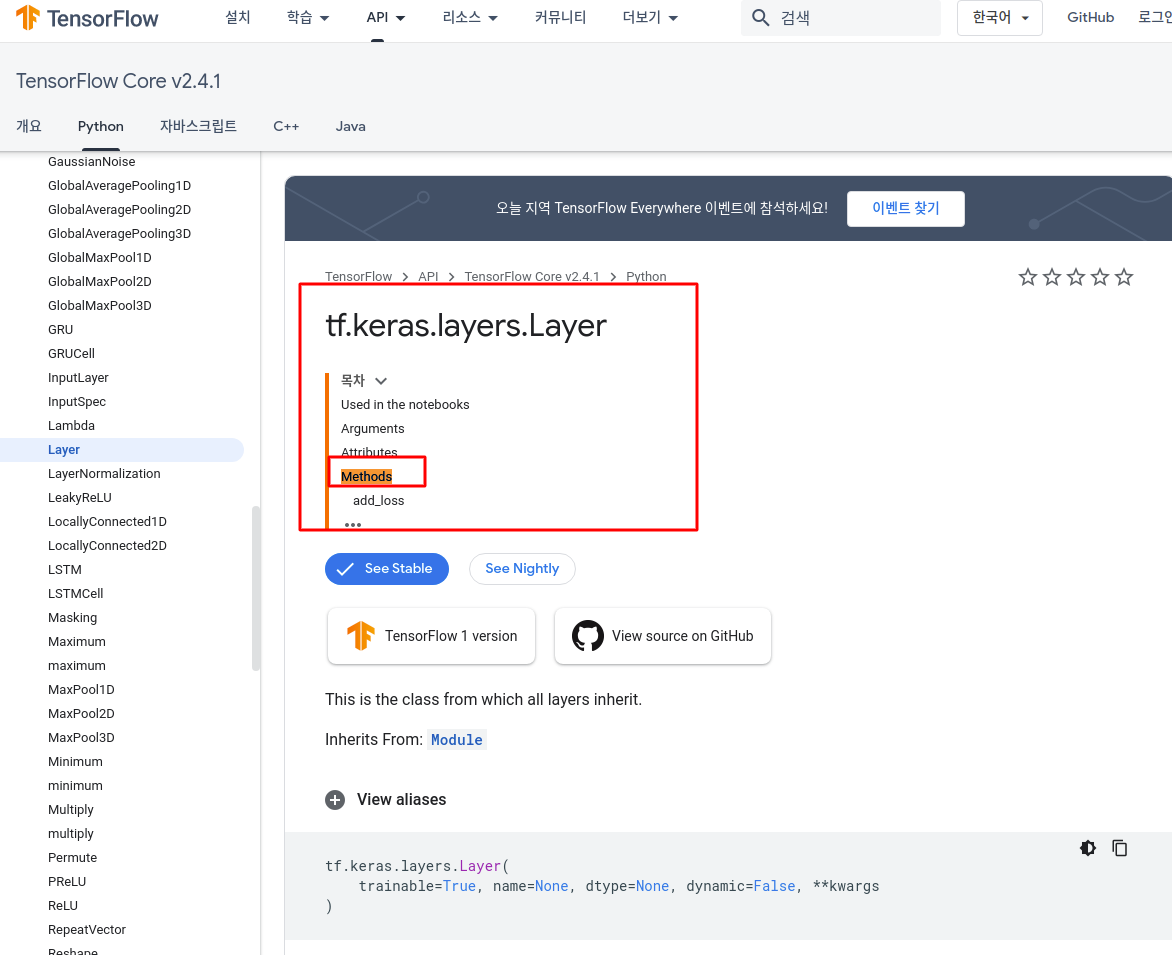

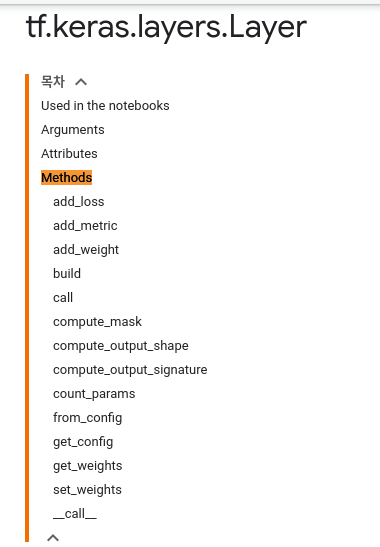 <br>
https://www.tensorflow.org/guide/keras/custom_layers_and_models?hl=ko <br>
**keras.layers.Layer와 keras.Model 중 어떤 클래스를 상속받아야, compile/fit/ evaluate/ predict 수행하는 서브클래스를 만들 수 있을까? 공식 문서의 Methods를 보고 판단해보자**

Model 클래스는 Layer와 같은 API를 가지며, 다음과 같은 차이점이 있습니다.

내장 훈련, 평가 및 예측 루프( model.fit() , model.evaluate(), model.predict())를 제공합니다.
model.layers 속성을 통해 내부 레이어의 목록을 노출합니다.
저장 및 직렬화 API(save(), save_weights()...)를 노출합니다.
효과적으로, Layer 클래스는 문서에서 일컫는 "레이어"("컨볼루션 레이어" 또는 "되풀이 레이어"에서와 같이) 또는 "블록"("ResNet 블록" 또는 "Inception 블록"에서와 같이)에 해당합니다.

한편, Model 클래스는 문서에서 "모델"("딥 러닝 모델"에서) 또는 "네트워크"( "딥 신경망"에서)로 지칭되는 것에 해당합다.

"Layer 클래스를 사용해야 할까요? 아니면 Model 클래스를 사용해야 할까요?"라는 질문이 있다면 자문해 보세요. fit()을 호출해야 할까? save()를 호출해야 할까? 만약 그렇다면 Model를 사용하세요. 그렇지 않다면(클래스가 더 큰 시스템의 블록이거나 직접 훈련을 작성하고 코드를 저장하기 때문에) Layer를 사용하세요.

In [22]:
# 사용 라이브러리 import 
import tensorflow as tf
from tensorflow import keras

import numpy as np
# import matplotlib.pyplot as plt

In [57]:
fashion_mnist = keras.datasets.fashion_mnist

# Unpacking 
# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()   

In [37]:
# 0~255값을 가지도록 정규화 
x_train_norm, x_test_norm = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0

In [38]:
# channel 추가 
x_train = x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test =x_test_norm.reshape( -1, 28, 28, 1)

---

In [63]:
def mydataset(dataset):
    (x_train, y_train), (x_test, y_test) = dataset.load_data()
    
    # 0~255값을 가지도록 정규화 
    x_train_norm, x_test_norm = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
    
    # channel 추가 
    x_train = x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
    x_test =x_test_norm.reshape( -1, 28, 28, 1)
    
    return x_train, x_test, y_train, y_test

In [65]:
x_train, x_test, y_train, y_test = mydataset(fashion_mnist)

---

In [66]:
# train.py 

# 사용 라이브러리 import 
import tensorflow as tf
from tensorflow import keras

import numpy as np
# import matplotlib.pyplot as plt

# Subclassing 방식으로 모델 구현 
class MyModel(keras.Model):
    def __init__(self):
        # parent construnctor 불러오기 
        super(MyModel, self).__init__()
        
        # layer 선언
        self.conv1 = keras.layers.Conv2D(32, 3, activation = 'relu')
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(128, activation = 'relu')
        self.d2 = keras.layers.Dense(10, activation = 'softmax')
        
    # input을 반영한 각 layer 쌓기 
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)


### 만약 분류 클래스를 변수로서 정의하고 싶다면?

In [67]:
# train.py 

# 사용 라이브러리 import 
import tensorflow as tf
from tensorflow import keras

import numpy as np
# import matplotlib.pyplot as plt

# Subclassing 방식으로 모델 구현 
class CustomModel(keras.Model):
    def __init__(self, num_classes = 10, training = None):
        # parent construnctor 불러오기 
        super(CustomModel, self).__init__()
        
        # layer 선언
        self.conv1 = keras.layers.Conv2D(32, 3, activation = 'relu')
        self.flatten = keras.layers.Flatten()
        self.d1 = keras.layers.Dense(128, activation = 'relu')
        self.drop = keras.layers.Dropout(0.25)
        self.d2 = keras.layers.Dense(num_classes, activation = 'softmax')
        
    # input을 반영한 각 layer 쌓기 
    def call(self, inputs, training = None):
        x = self.conv1(inputs)
        x = self.flatten(x)
        x = self.d1(x)
        if training: # train일때와 아닐때의 batch normalize, dropout의 사용유무 차이 있음 
            x = self.drop(x, training = training)
        return self.d2(x)    

In [68]:
# 모델 학습 설정
model = CustomModel(num_classes = 10, training = True) # dropout 사용 

# 학습 관련 부분을 작성해주세요
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=1)

model.evaluate(x_test,  y_test, verbose=2)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4051 - accuracy: 0.8566
313/313 - 1s - loss: 0.3384 - accuracy: 0.8760


[0.3384251296520233, 0.8759999871253967]

# 프로젝트 진행할때 추천하는 코드 스타일? 
모델 학습과 테스트는 Subclassing => pycharm으로 .py, Jupyterlab으로 .ipynb
https://github.com/Jasonlee1995/2020_NIPA/blob/main/Round%201/Implementation/Train_Finetune.ipynb

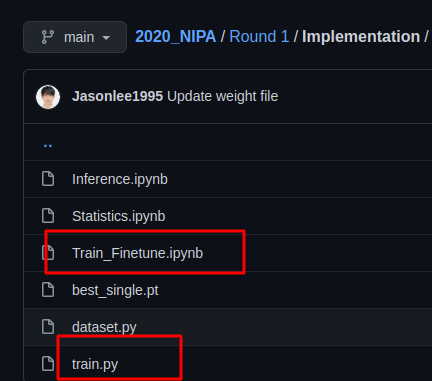

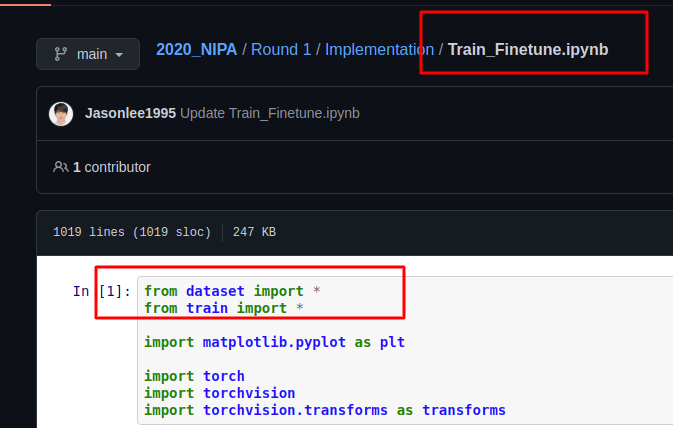

# 결론 ? 느낀 점? <br> 
이번 진행을 통해 느낀 점은 왜 Pytorch가 트렌드가 되어가느냐를 느꼈습니다. 
https://medium.com/@taeksoon/3%EB%B6%84-%EB%94%A5%EB%9F%AC%EB%8B%9D-%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A7%9B-901aeef18f48

> PyTorch
우선 공식 문서가 상당히 깔끔하다. 읽기 좋은 문서가 씹고 뜯기에도 좋은 법인데 그런 면에서 PyTorch의 문서들은 직관적이고 필요한 내용을 어디서 찾아야 하는지 쉽게 알 수 있다.
PyTorch는 딥러닝 모델을 만드는데 한가지 방법만을 소개하기 때문에 고민 없이 사용 가능하다. (심화과정에서 더 있는지는 모르겠으나 최소한 입문용 문서에는 한가지로 통일되어있다.) Tensorflow의 Keras Subclassing API와 유사한데 Tensorflow도 애초에 이거 하나만 제공했으면 어땠을까 싶다. 물론 아주 간단한 구조의 네트워크를 만들고 학습하는데는 Keras Sequential API가 훨씬 쉽다. 입문에는 이만한게 없지만 조금만 더 복잡한 일을 하려고 하면 결국 Functional API나 Subclassing API를 손대기 시작해야하는데, 서로간에 호환이 잘 안되는 부분이 꽤 있다는것이 문제다. 이걸 일일이 언급하다간 지면이 부족하므로 생략한다.

역할 분담이 가능해진다. <br>
jupyer notebook => 시각화, 실행 <br>
pycharm => custom 서브 클래스 <br>
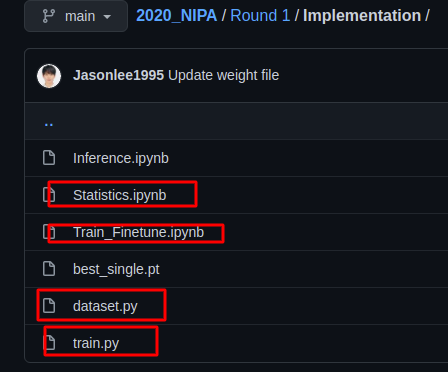